In [60]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap, cm
import shapefile
import pandas as pd


In [78]:
def ColorTableCH(colores,niveles):
    arraytemp=np.array(colores)/255.
    cmap_mio = matplotlib.colors.ListedColormap(arraytemp)
    clevs=niveles
    norm = matplotlib.colors.BoundaryNorm(clevs, cmap_mio.N)
    return norm,cmap_mio

def ColorTableCHInterpol(coloresbase,nivelesbase,nivelesdeseados):
    arraytemp=np.array(coloresbase)/255.
   
    arrayinterpolated=np.ones([len(nivelesdeseados),3])
    for i in range(3):
        arrayinterpolated[:,i]=np.interp(nivelesdeseados, np.array(nivelesbase), np.array(arraytemp)[:,i])
    
    cmap_mio = matplotlib.colors.ListedColormap(arrayinterpolated)
    clevs=nivelesdeseados
    norm = matplotlib.colors.BoundaryNorm(clevs, cmap_mio.N)
    return norm,cmap_mio

In [61]:
Norte= 7.30000
Sur  = 5.10000
Este = -74.3000
Oeste= -76.6000

Lats = np.linspace(Sur, Norte, 1728)
Lons = np.linspace(Oeste, Este, 1728)

In [108]:
Data = [['2014-06-08','21:00', 'Don Matias',6.493709,-75.390054],
['2014-06-24','22:00', 'Girardota',6.378635,-75.448778],
['2014-06-25','20:00', 'Cocorna',6.059296,-75.185385],
['2014-06-25','20:00', 'Marinilla',6.176584,-75.342281],
['2014-06-25','20:00', 'Santuario',6.126705,-75.261575],
['2014-08-14','02:00', 'Santuario',6.126705,-75.261575],
['2015-04-03','02:00', 'Cocorna',6.058498,-75.185974],
['2015-04-20','19:00', 'Belmira',6.608511,-75.66737],
['2015-11-12','19:00', 'Vegachi',6.776405,-75.794922],
['2016-04-28','22:00', 'Rionegro',6.146843,-75.3742],
['2016-05-10','00:00', 'Caldas',6.096631,-75.634839],
['2017-06-15','18:00', 'Ran Rafael',6.299513,-75.032511],
['2017-09-17','03:00', 'Ran Rafael',6.299513,-75.032511],
['2017-09-18','20:00', 'Urrao',6.30676,-76.133717],
['2017-10-20','06:00', 'Ciudad Bolivar',5.853761,-76.025635],
['2017-11-22','07:00', 'Venecia',5.970387,-75.838373],
['2018-03-25','20:00', 'Itagui',6.17086,-75.61954],
['2018-03-26','22:00', 'Bello',6.33831,-75.574932],
['2018-04-10','01:00', 'Bello',6.309455,-75.553085],
['2018-04-12','01:00', 'Venecia',5.970387,-75.838373],
['2018-04-26','09:00', 'Caracoli',6.408763,-74.757415],
['2018-04-27','03:00', 'Santo Domingo',6.47552,-75.166255],
['2018-05-15','20:00', 'Medellin',6.230873,-75.575502],
['2018-07-21','02:00', 'Cisneros',6.538389,-75.087162],
['2018-08-05','06:00', 'Caracoli',6.408763,-74.757415],
['2018-09-14','22:00', 'La Ceja',6.028261,-75.432004],
['2018-09-27','21:00', 'Medellin',6.238916,-75.568011],
['2018-10-10','21:00', 'Santa Rosa de Osos',6.652102,-75.458733],
['2018-10-24','02:00', 'Puerto Triunfo',5.928519,-74.772618],
['2018-10-24','02:00', 'Sonson',5.837626,-74.828837],
['2018-10-29','10:00', 'Caracoli',6.408728,-74.757749],
['2018-11-01','20:00', 'Urrao',6.30676,-76.133717],
['2018-11-04','17:00', 'Santa Rosa de Osos',6.652102,-75.458733],
['2018-11-06','18:00', 'Marinilla',6.183036,-75.344153],
['2018-11-14','21:00', 'Bello',6.349609,-75.561114],
['2018-11-26','21:00', 'Anza',6.301789,-75.852457]]

In [109]:
Num = 23

Lat = Data[Num][3]
Lon = Data[Num][4]

Dia = Data[0][0]

Punto_lat = np.where((Lats >= Lat))[0][0]
Punto_lon = np.where((Lons >= Lon))[0][0]

print (Data[Num][2] + ' ' + Data[Num][0])


Cisneros 2018-07-21


In [110]:
x = int(Punto_lat/432) + 1
y = int(Punto_lon/432) + 1


print (x)
print (y)

Pos_Lat = Punto_lat%432
Pos_Lon = Punto_lon%432

print (Pos_Lat)
print (Pos_Lon)

3
3
266
272


In [133]:
File      = '/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_'+str(x)+str(y)+'.npy'
X_1H = np.load(File, mmap_mode='r')
print (File)

File      = '/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_'+str(x)+str(y)+'.npy'
X_96H = np.load(File, mmap_mode='r')
print (File)


/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy


In [189]:
Serie_Hora = np.array(X_1H[Pos_Lat , Pos_Lon ,:])


P95_H     = np.percentile(Serie_Hora,95)
P99_H     = np.percentile(Serie_Hora,99)
P99_9_H   = np.percentile(Serie_Hora,99.9)


Serie_96H   = np.array(X_96H[Pos_Lat,Pos_Lon,:])
P95_96H     = np.percentile(Serie_96H,95)
P99_96H     = np.percentile(Serie_96H,99)
P99_9_96H   = np.percentile(Serie_96H,99.9)

In [219]:
Serie_Hora      = np.array(X_1H[Pos_Lat-10 : Pos_Lat+10, Pos_Lon-10:Pos_Lon+10,:])
Serie_Hora_Acum = Serie_Hora.sum(axis=0).sum(axis=0)
Serie_Hora_P90  = np.array([np.nanpercentile(Serie_Hora[:,:,i], 90) for i in list(range(Serie_Hora.shape[2]))])

P95_H     = np.percentile(Serie_Hora_Acum,95)
P99_H     = np.percentile(Serie_Hora_Acum,99)
P99_9_H   = np.percentile(Serie_Hora_Acum,99.9)

# --------------------------------------------------

Serie_96H   = np.array(X_96H[Pos_Lat-10 : Pos_Lat+10, Pos_Lon-10:Pos_Lon+10,:])
Serie_96H_Acum = Serie_96H.sum(axis=0).sum(axis=0)
Serie_96H_P90  = np.array([np.nanpercentile(Serie_96H[:,:,i], 90) for i in list(range(Serie_96H.shape[2]))])

P95_96H     = np.percentile(Serie_96H_Acum,95)
P99_96H     = np.percentile(Serie_96H_Acum,99)
P99_9_96H   = np.percentile(Serie_96H_Acum,99.9)

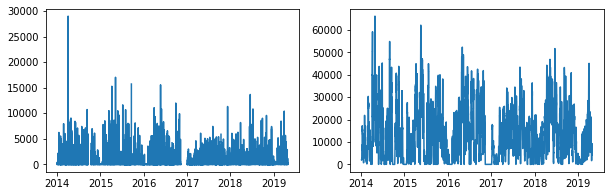

In [221]:
fig = plt.figure(figsize=[10,3])

ax = fig.add_subplot(121)
plt.plot(pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H'), Serie_Hora_Acum)


ax = fig.add_subplot(122)
plt.plot(pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H')[96:], Serie_96H_Acum)


In [223]:
SerieHora_DF = pd.DataFrame(Serie_Hora_Acum, pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H'))
Serie96H_DF  = pd.DataFrame(Serie_96H_Acum, pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H')[96:])


Hora = Data[Num][1]

Acum_Hora = SerieHora_DF[SerieHora_DF.index == Dia + ' ' + Hora].values[0]
Acum_96H  = Serie96H_DF[Serie96H_DF.index == Dia + ' ' + Hora].values[0]

print (Acum_Hora, Acum_96H)

[0.] [22725.9426]


[0.] [22725.9426]


<Figure size 432x288 with 0 Axes>

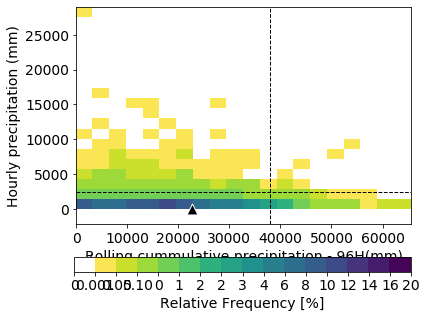

In [225]:
Hora   = Serie_Hora_Acum[96:][np.isfinite(Serie_Hora_Acum[96:]) & np.isfinite(Serie_96H_Acum)]
Hora96 = Serie_96H_Acum[np.isfinite(Serie_Hora_Acum[96:]) & np.isfinite(Serie_96H_Acum)]


Hora_dqLl   = Hora[Hora > 0]
Hora96_dqLl = Hora96[Hora > 0]

H, xedg, yedg = np.histogram2d(Hora96_dqLl,Hora_dqLl,bins=20)
H = H.T
H_PDF = H/np.sum(H)


import matplotlib.colors as colors

lev2 = np.array([0.,0.00001,0.0005,0.001,0.005,0.01,0.015,0.02, 0.03, 0.04,\
                0.06, 0.08, 0.1, 0.12,\
                0.14, 0.16,0.2])

lev_ticks = lev2*100.

# Este truco es para que me queden mas bonitos los ticks porque los primeros tienen muchas # cifras decimales y los ultimos
lev_str0 = np.array(list(map(lambda x: np.str("%.3f" % x), lev_ticks[1:2])))
lev_str1 = np.array(list(map(lambda x: np.str("%.2f" % x), lev_ticks[2:4])))
lev_str2 = np.array(list(map(lambda x: np.str("%.f" % x), lev_ticks[4:])))
lev_str  = np.append(['0'],lev_str0)
lev_str  = np.append(lev_str,lev_str1)
lev_str = np.append(lev_str, lev_str2)

# Esta barra de colores es una viridis discreta , la cree porque no encontra una forma facil de #discretizar
bar_colors2 = [(255,255,255),(250,230,85),(203,224,45),(158,217,58),\
               (114,206,85),(78,193,107),(46.,177,125.),(37,161,134),\
               (33,145,141),(39,127, 142),(45,110,142),\
               (54,92,140), (61,74,136), (69,51,125), (70,29,109),\
              (68,5,88)]

color = list(map(lambda x: tuple(ti/255. for ti in x) , bar_colors2))
my_colorbar, norm = colors.from_levels_and_colors(lev2, color)

#H_PDF[H_PDF == 0.0] = np.nan

label_size = 14

plt.close()
plt.cla()
plt.clf()

#fig = plt.figure(figsize=[12,10])
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.set_title('Title', fontsize = label_size, loc = 'left')
# Se hace el meshgrid con bins del hist 2d

X, Y = np.meshgrid(xedg, yedg)
#ax1.set_ylim(0.0, 35.)
#ax1.set_xlim(0.0, 200.)
ax1.set_xlabel('Rolling cummulative precipitation - 96H(mm)', fontsize = label_size)
ax1.set_ylabel('Hourly precipitation (mm)', fontsize = label_size)
ax1.tick_params(axis='x', labelsize= label_size)
ax1.tick_params(axis='y', labelsize= label_size)
ax1.axhline(np.percentile(Hora_dqLl,95), color='k', ls='--',lw=1)
ax1.axvline(np.percentile(Hora96_dqLl,95), color='k', ls='--',lw=1)
pc1 = ax1.pcolormesh(X, Y,H_PDF, cmap = my_colorbar, norm = norm)

SerieHora_DF = pd.DataFrame(Serie_Hora_Acum, pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H'))
Serie96H_DF  = pd.DataFrame(Serie_96H_Acum, pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H')[96:])

Acum_Hora = SerieHora_DF[SerieHora_DF.index == Dia + ' ' + Data[Num][1]].values[0]
Acum_96H  = Serie96H_DF[Serie96H_DF.index == Dia + ' ' + Data[Num][1]].values[0]

print (Acum_Hora, Acum_96H)

plt.scatter(Acum_96H, Acum_Hora, marker='^', s=120, color='k',edgecolor='w')

# Aqui cuadras la barra de colores
cbar_ax = fig.add_axes([0.12, -0.04, 0.78, 0.05])
cbar = fig.colorbar(pc1, cax = cbar_ax, orientation = 'horizontal',\
                    ticks = lev2)
cbar.set_label(u'Relative Frequency [%]', fontsize = label_size)
cbar.ax.set_xticklabels(lev_str)
cbar.ax.tick_params(labelsize=label_size)
#plt.savefig('nombre_figura.pdf', format = 'pdf', bbox_inches='tight')



In [184]:
SerieHora_DF.index[np.where((SerieHora_DF.values[96:] > 10) & (Serie96H_DF.values > 100))[0]]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


DatetimeIndex(['2014-03-31 21:00:00', '2014-04-02 00:00:00',
               '2014-04-22 22:00:00', '2014-11-09 21:00:00',
               '2015-05-18 04:00:00', '2015-10-07 13:00:00',
               '2018-06-16 03:00:00'],
              dtype='datetime64[ns]', freq=None)

Don Matias 2014-06-08
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[3.45651875] [37.02332354]


<Figure size 432x288 with 0 Axes>

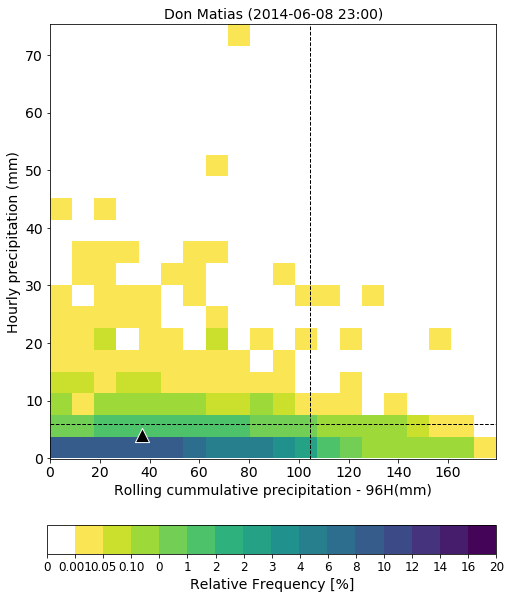

Girardota 2014-06-24
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
Cocorna 2014-06-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

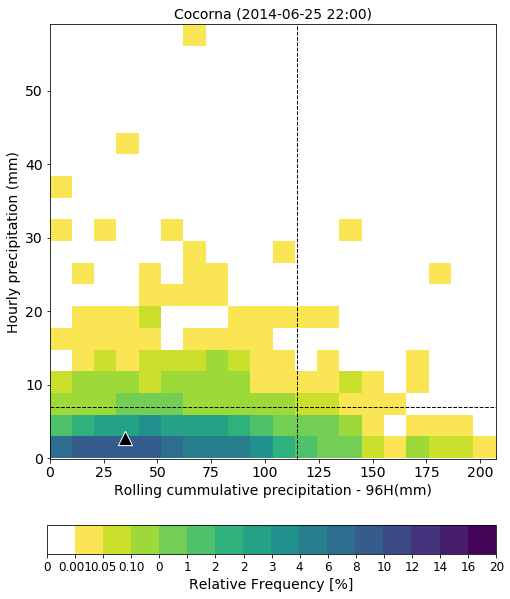

Marinilla 2014-06-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

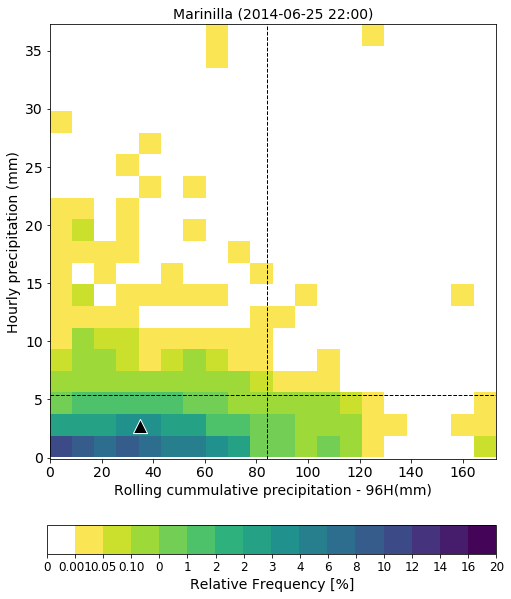

Santuario 2014-06-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

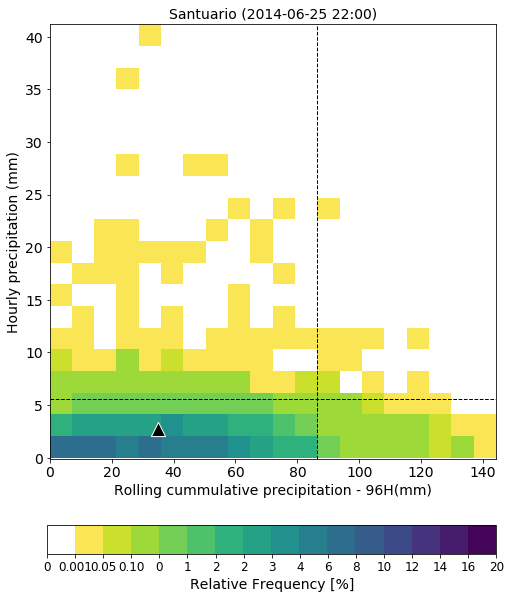

Santuario 2014-08-14
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.] [42.87187779]


<Figure size 432x288 with 0 Axes>

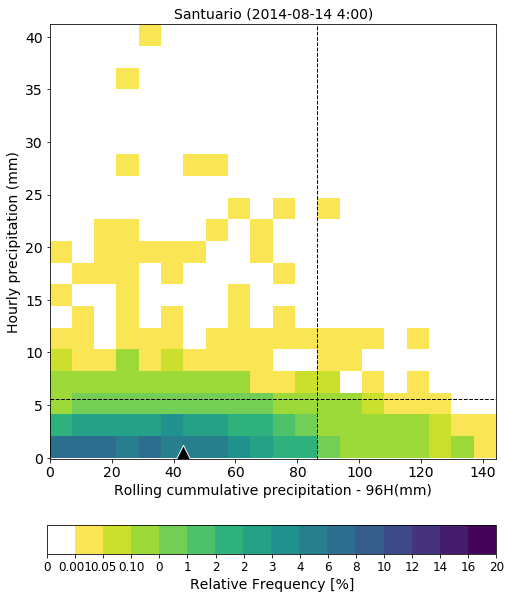

Cocorna 2015-04-03
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.] [42.87187779]


<Figure size 432x288 with 0 Axes>

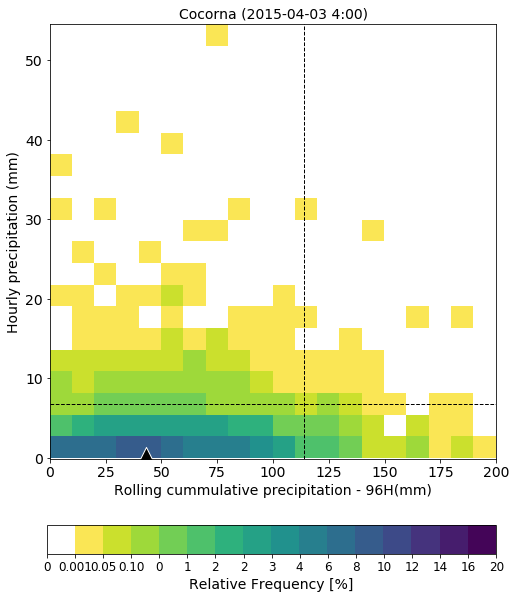

Belmira 2015-04-20
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [34.79693038]


<Figure size 432x288 with 0 Axes>

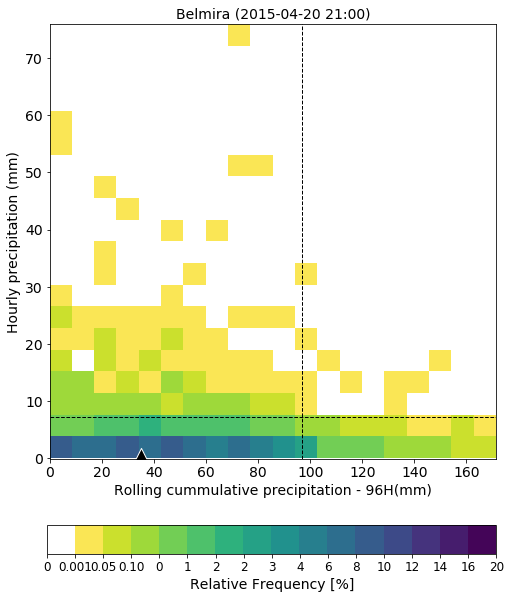

Vegachi 2015-11-12
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_42.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_42.npy
[0.] [34.79693038]


<Figure size 432x288 with 0 Axes>

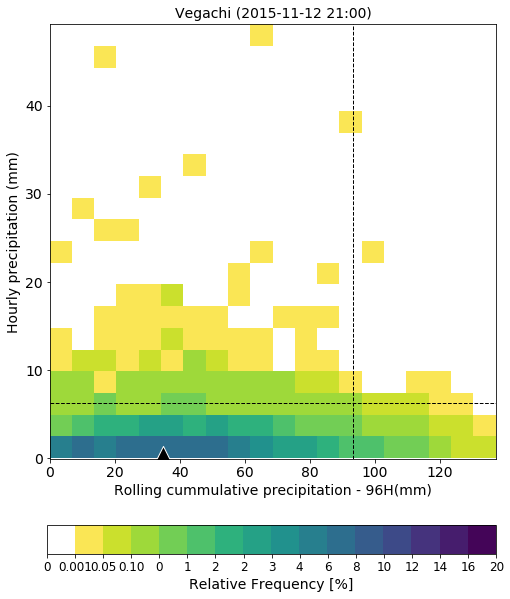

Rionegro 2016-04-28
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
Caldas 2016-05-10
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.] [44.39994093]


<Figure size 432x288 with 0 Axes>

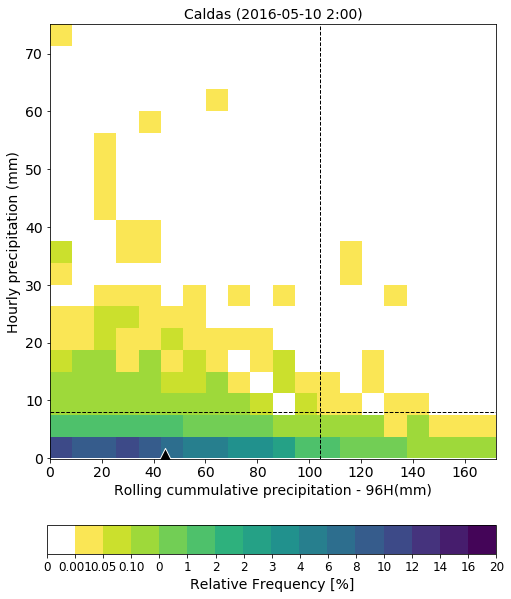

Ran Rafael 2017-06-15
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.] [34.79693038]


<Figure size 432x288 with 0 Axes>

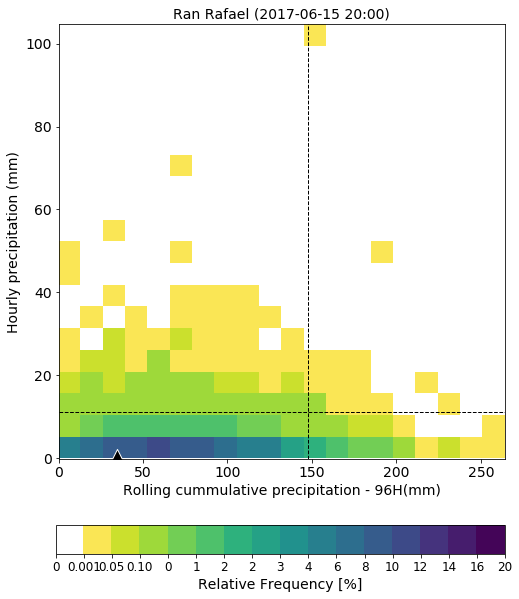

Ran Rafael 2017-09-17
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.] [39.84529204]


<Figure size 432x288 with 0 Axes>

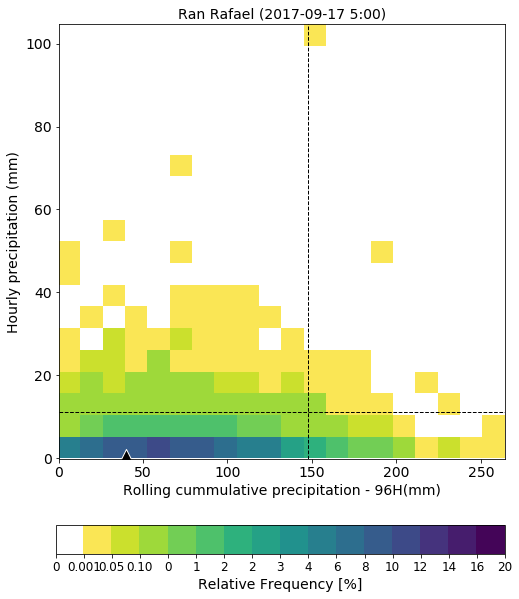

Urrao 2017-09-18
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_31.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_31.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

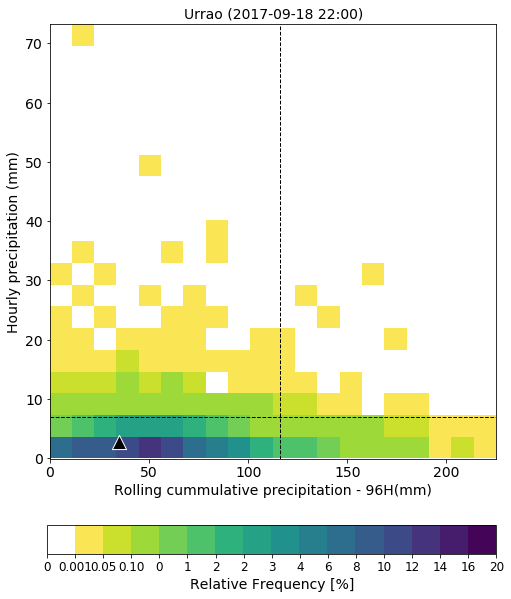

Ciudad Bolivar 2017-10-20
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.51500364] [34.24815345]


<Figure size 432x288 with 0 Axes>

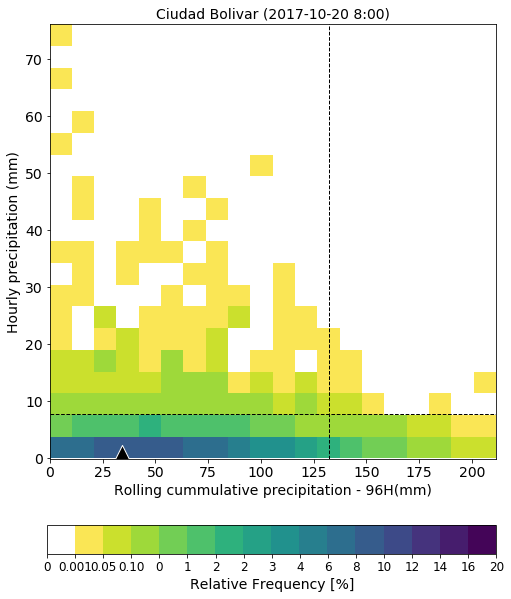

Venecia 2017-11-22
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.32549125] [34.47344868]


<Figure size 432x288 with 0 Axes>

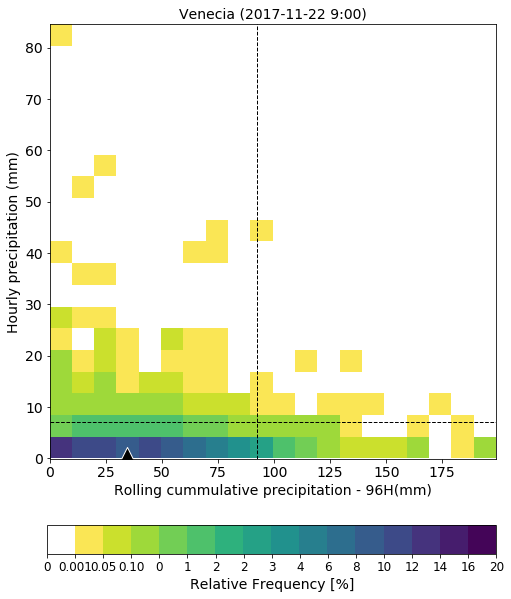

Itagui 2018-03-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

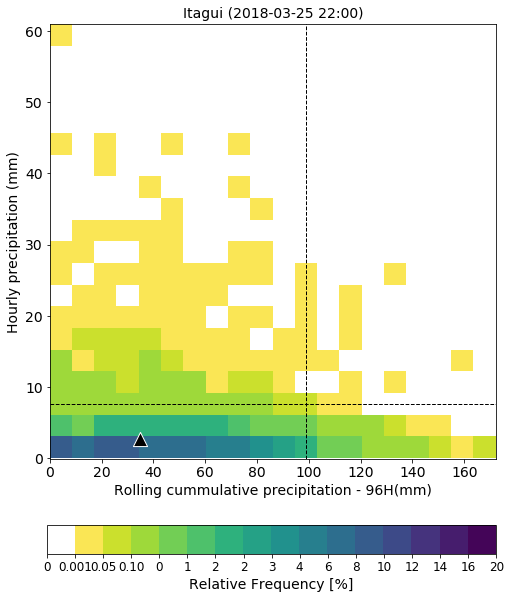

Bello 2018-03-26
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
Bello 2018-04-10
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [43.86059893]


<Figure size 432x288 with 0 Axes>

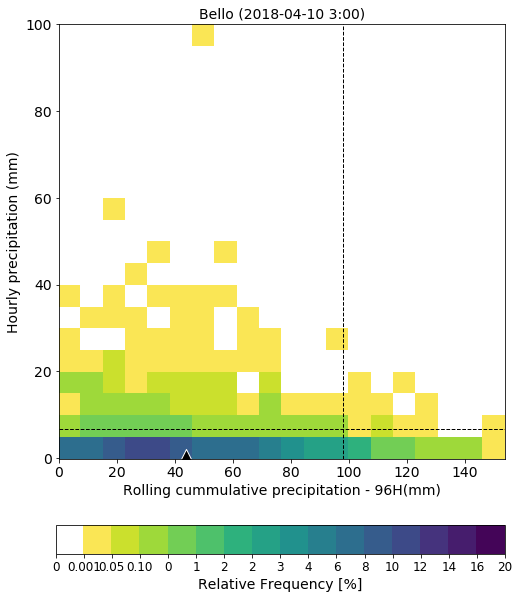

Venecia 2018-04-12
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.] [43.86059893]


<Figure size 432x288 with 0 Axes>

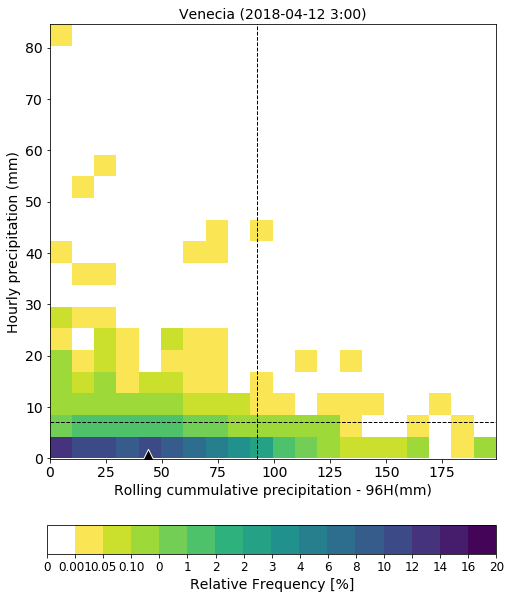

Caracoli 2018-04-26
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_34.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_34.npy
[0.] [34.79893993]


<Figure size 432x288 with 0 Axes>

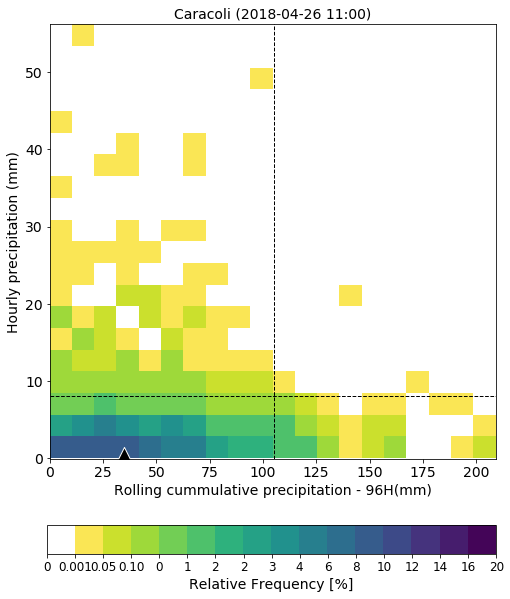

Santo Domingo 2018-04-27
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.] [39.84529204]


<Figure size 432x288 with 0 Axes>

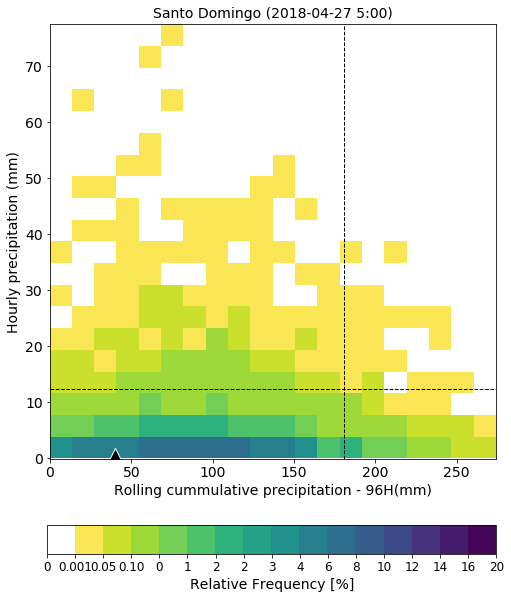

Medellin 2018-05-15
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

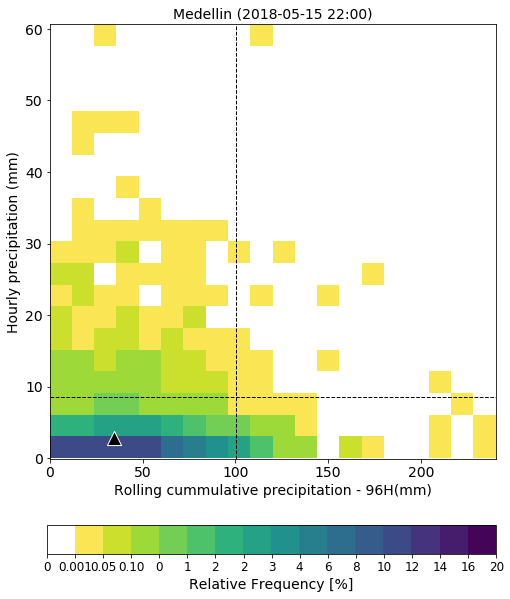

Cisneros 2018-07-21
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.] [42.87187779]


<Figure size 432x288 with 0 Axes>

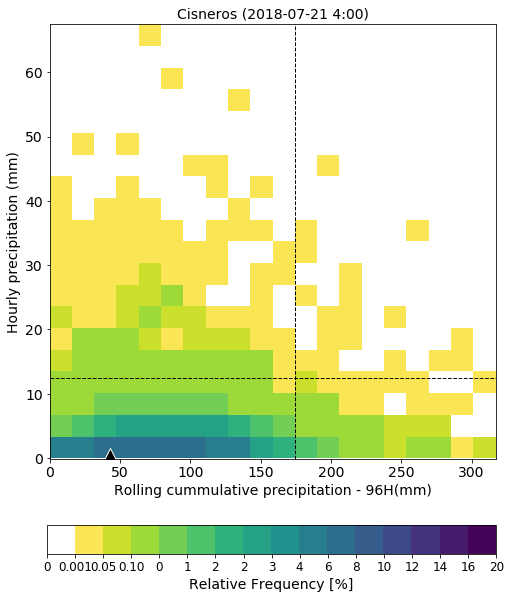

Caracoli 2018-08-05
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_34.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_34.npy
[0.51500364] [34.24815345]


<Figure size 432x288 with 0 Axes>

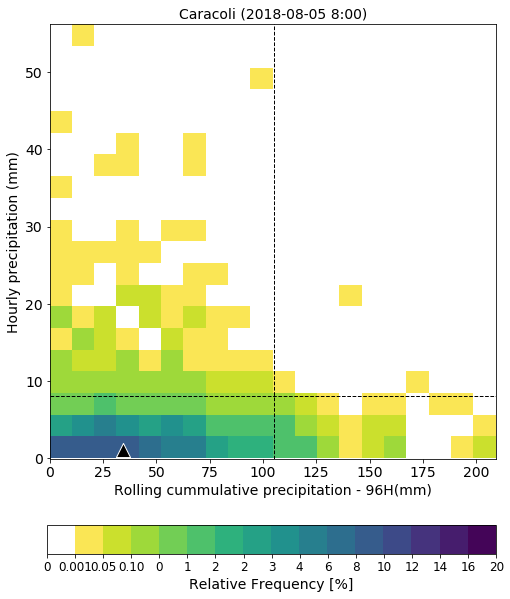

La Ceja 2018-09-14
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
Medellin 2018-09-27
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[3.45651875] [37.02332354]


<Figure size 432x288 with 0 Axes>

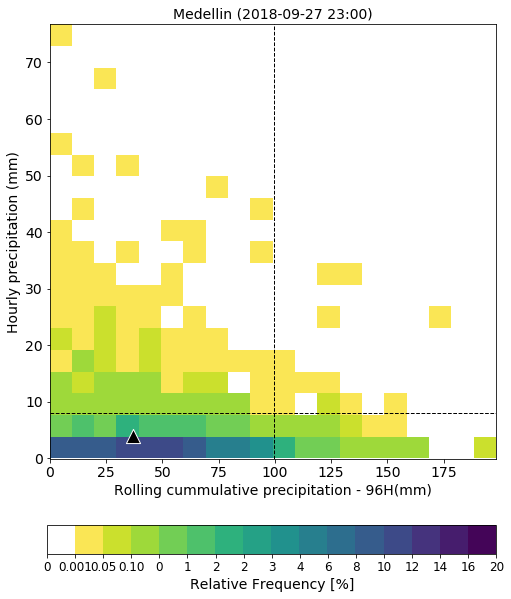

Santa Rosa de Osos 2018-10-10
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[3.45651875] [37.02332354]


<Figure size 432x288 with 0 Axes>

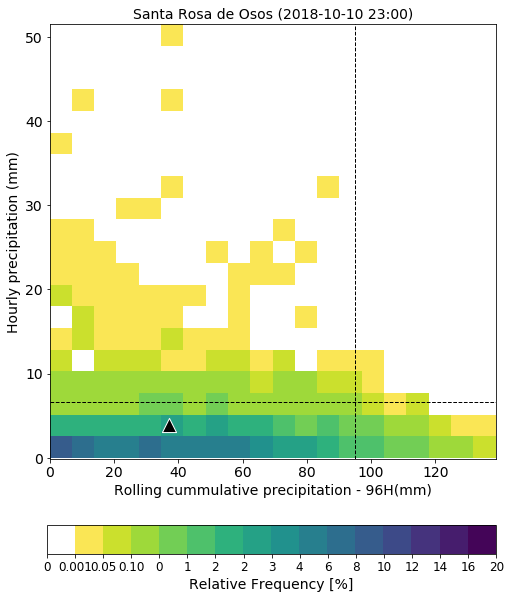

Puerto Triunfo 2018-10-24
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_24.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_24.npy
[0.] [42.87187779]


<Figure size 432x288 with 0 Axes>

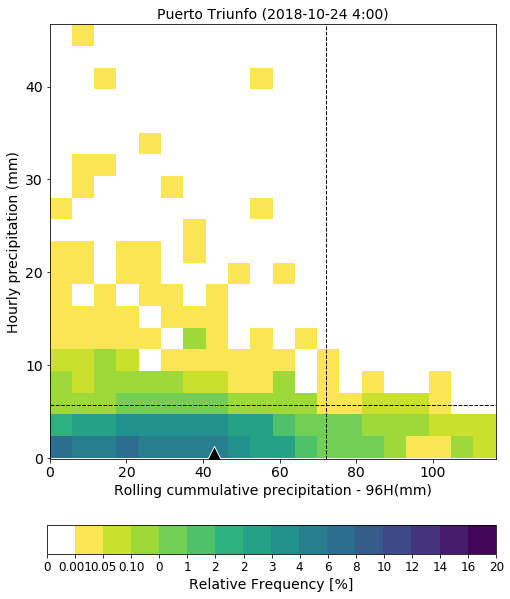

Sonson 2018-10-24
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_24.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_24.npy
[0.] [42.87187779]


<Figure size 432x288 with 0 Axes>

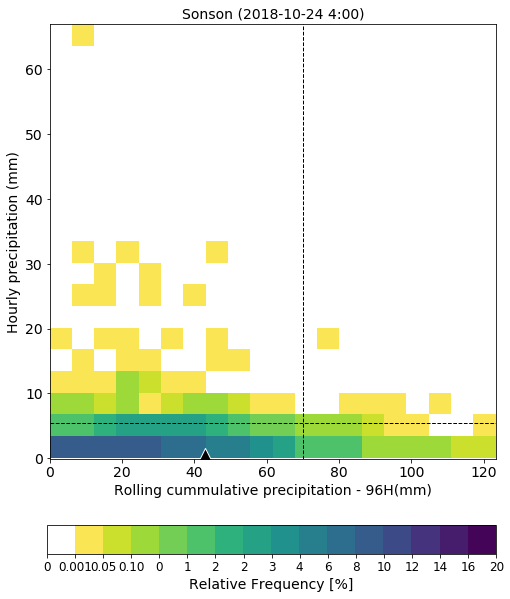

Caracoli 2018-10-29
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_34.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_34.npy
[0.] [34.79893993]


<Figure size 432x288 with 0 Axes>

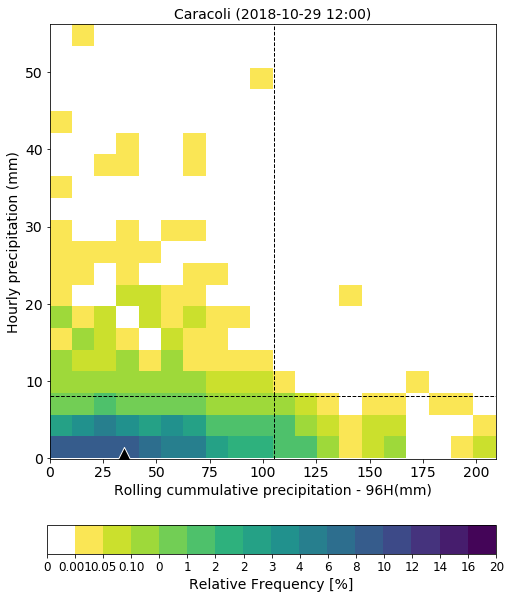

Urrao 2018-11-01
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_31.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_31.npy
[2.23683591] [34.78648763]


<Figure size 432x288 with 0 Axes>

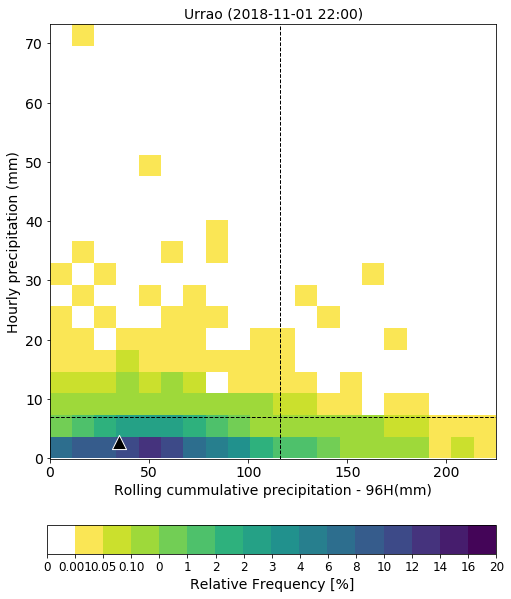

Santa Rosa de Osos 2018-11-04
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [34.79693038]


<Figure size 432x288 with 0 Axes>

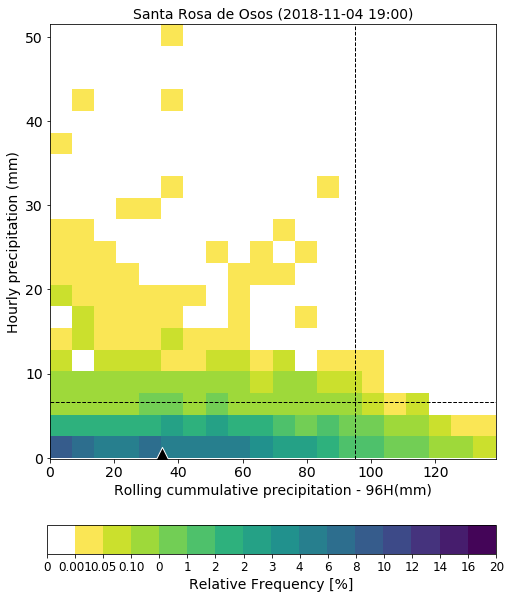

Marinilla 2018-11-06
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.] [34.79693038]


<Figure size 432x288 with 0 Axes>

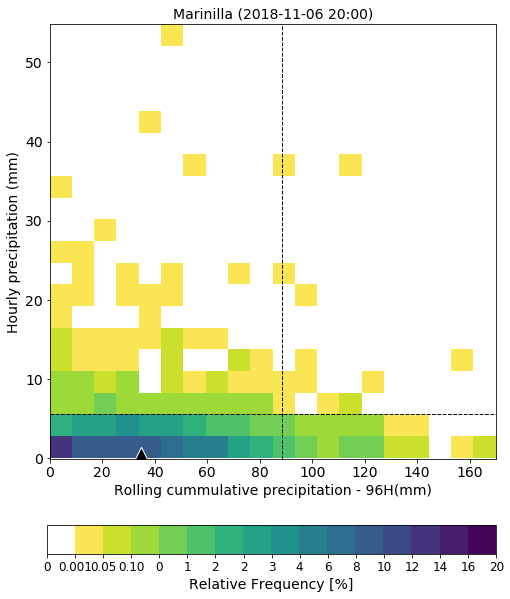

Bello 2018-11-14
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[3.45651875] [37.02332354]


<Figure size 432x288 with 0 Axes>

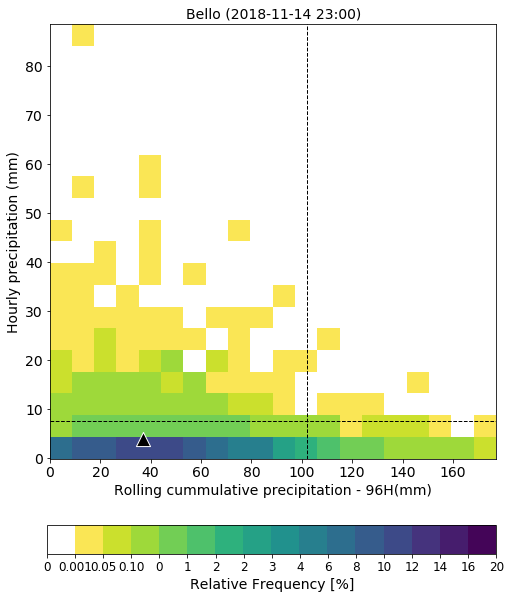

Anza 2018-11-26
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[3.45651875] [37.02332354]


<Figure size 432x288 with 0 Axes>

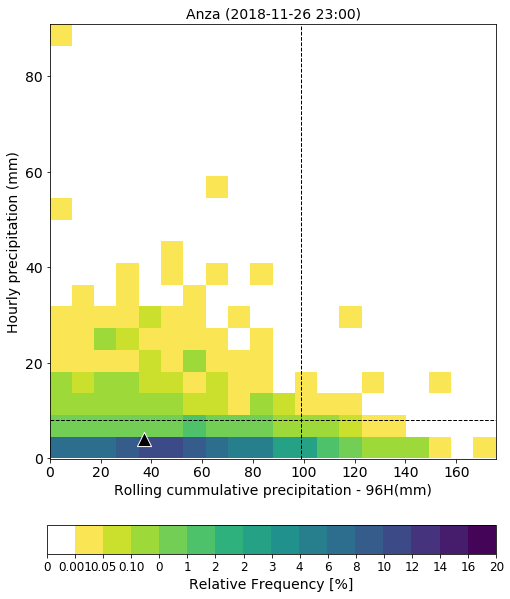

In [272]:
for Num in range(36):

    Lat = Data[Num][3]
    Lon = Data[Num][4]

    Dia = Data[0][0]

    Punto_lat = np.where((Lats >= Lat))[0][0]
    Punto_lon = np.where((Lons >= Lon))[0][0]

    print (Data[Num][2] + ' ' + Data[Num][0])

    x = (Punto_lat//432) + 1
    y = (Punto_lon//432) + 1

    Pos_Lat = Punto_lat%432
    Pos_Lon = Punto_lon%432

    File      = '/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_'+str(x)+str(y)+'.npy'
    X_1H = np.load(File, mmap_mode='r')
    print (File)

    File      = '/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_'+str(x)+str(y)+'.npy'
    X_96H = np.load(File, mmap_mode='r')
    print (File)

    Serie_Hora = np.array(X_1H[Pos_Lat,Pos_Lon,:])
    P95_H     = np.percentile(Serie_Hora,95)
    P99_H     = np.percentile(Serie_Hora,99)
    P99_9_H   = np.percentile(Serie_Hora,99.9)


    Serie_96H   = np.array(X_96H[Pos_Lat,Pos_Lon,:])
    P95_96H     = np.percentile(Serie_96H,95)
    P99_96H     = np.percentile(Serie_96H,99)
    P99_9_96H   = np.percentile(Serie_96H,99.9)

    Hora   = Serie_Hora[96:][np.isfinite(Serie_Hora[96:]) & np.isfinite(Serie_96H)]
    Hora96 = Serie_96H[np.isfinite(Serie_Hora[96:]) & np.isfinite(Serie_96H)]
    
    

    Hora_dqLl   = Hora[Hora > 0]
    Hora96_dqLl = Hora96[Hora > 0]

    H, xedg, yedg = np.histogram2d(Hora96_dqLl,Hora_dqLl,bins=20)
    H = H.T
    H_PDF = H/np.sum(H)


    import matplotlib.colors as colors

    lev2 = np.array([0.,0.00001,0.0005,0.001,0.005,0.01,0.015,0.02, 0.03, 0.04,\
                    0.06, 0.08, 0.1, 0.12,\
                    0.14, 0.16,0.2])

    lev_ticks = lev2*100.

    # Este truco es para que me queden mas bonitos los ticks porque los primeros tienen muchas # cifras decimales y los ultimos
    lev_str0 = np.array(list(map(lambda x: np.str("%.3f" % x), lev_ticks[1:2])))
    lev_str1 = np.array(list(map(lambda x: np.str("%.2f" % x), lev_ticks[2:4])))
    lev_str2 = np.array(list(map(lambda x: np.str("%.f" % x), lev_ticks[4:])))
    lev_str  = np.append(['0'],lev_str0)
    lev_str  = np.append(lev_str,lev_str1)
    lev_str = np.append(lev_str, lev_str2)

    # Esta barra de colores es una viridis discreta , la cree porque no encontra una forma facil de #discretizar
    bar_colors2 = [(255,255,255),(250,230,85),(203,224,45),(158,217,58),\
                   (114,206,85),(78,193,107),(46.,177,125.),(37,161,134),\
                   (33,145,141),(39,127, 142),(45,110,142),\
                   (54,92,140), (61,74,136), (69,51,125), (70,29,109),\
                  (68,5,88)]

    color = list(map(lambda x: tuple(ti/255. for ti in x) , bar_colors2))
    my_colorbar, norm = colors.from_levels_and_colors(lev2, color)

    #H_PDF[H_PDF == 0.0] = np.nan

    label_size = 14

    plt.close()
    plt.cla()
    plt.clf()

    #fig = plt.figure()
    fig = plt.figure(figsize=[8,8])
    ax1 = fig.add_subplot(111)
    # Se hace el meshgrid con bins del hist 2d

    X, Y = np.meshgrid(xedg, yedg)
    ax1.set_xlim(0, np.max(xedg))
    ax1.set_ylim(-0.1, np.max(yedg))
    #ax1.set_xlim(0.0, 200.)
    ax1.set_xlabel('Rolling cummulative precipitation - 96H(mm)', fontsize = label_size)
    ax1.set_ylabel('Hourly precipitation (mm)', fontsize = label_size)
    ax1.tick_params(axis='x', labelsize= label_size)
    ax1.tick_params(axis='y', labelsize= label_size)
    ax1.axhline(np.percentile(Hora_dqLl,95), color='k', ls='--',lw=1)
    ax1.axvline(np.percentile(Hora96_dqLl,95), color='k', ls='--',lw=1)
    pc1 = ax1.pcolormesh(X, Y,H_PDF, cmap = my_colorbar, norm = norm)
    #plt.gca().set_aspect('equal',adjustable='box')

    Hour = str(int(Data[Num][1][:2]) + 2)
    if Hour == '24':
        continue
        
    SerieHora_DF = pd.DataFrame(Serie_Hora_Acum, pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H'))
    Serie96H_DF  = pd.DataFrame(Serie_96H_Acum, pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H')[96:])
       
    Acum_Hora = SerieHora_DF[SerieHora_DF.index == Dia + ' ' + Hour + ':00'].values[0]
    Acum_96H  = Serie96H_DF[Serie96H_DF.index == Dia + ' ' + Hour + ':00'].values[0]
    
    print (Acum_Hora, Acum_96H)

    plt.scatter(Acum_96H, Acum_Hora+0.5, marker='^', s=200, color='k',edgecolor='w')
    
    
    ax1.set_title(Data[Num][2] + ' (' + Data[Num][0]+ ' '+ str(int(Data[Num][1][:2]) + 2)+':00)', \
              fontsize = label_size)



    # Aqui cuadras la barra de colores
    cbar_ax = fig.add_axes([0.12, -0.04, 0.78, 0.05])
    cbar = fig.colorbar(pc1, cax = cbar_ax, orientation = 'horizontal',\
                        ticks = lev2)
    cbar.set_label(u'Relative Frequency [%]', fontsize = label_size)
    cbar.ax.set_xticklabels(lev_str)
    cbar.ax.tick_params(labelsize=label_size-2)
    plt.savefig(Data[Num][2] + '_' + Data[Num][0] + '_2_.png', dpi=300, bbox_inches='tight')
    plt.show()



Don Matias 2014-06-08
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.63014] [40.83030182]


<Figure size 432x288 with 0 Axes>

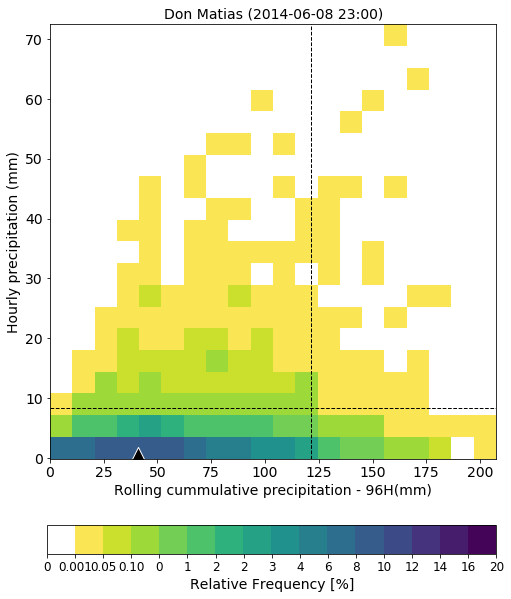

Girardota 2014-06-24
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


Cocorna 2014-06-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.65948182] [119.79002909]


<Figure size 432x288 with 0 Axes>

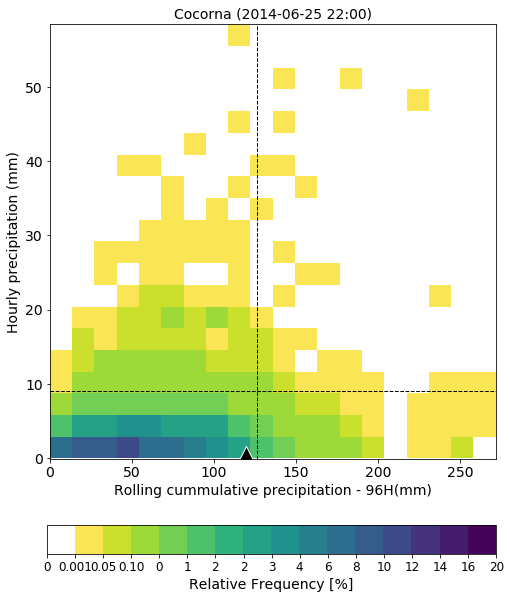

Marinilla 2014-06-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.] [45.22156182]


<Figure size 432x288 with 0 Axes>

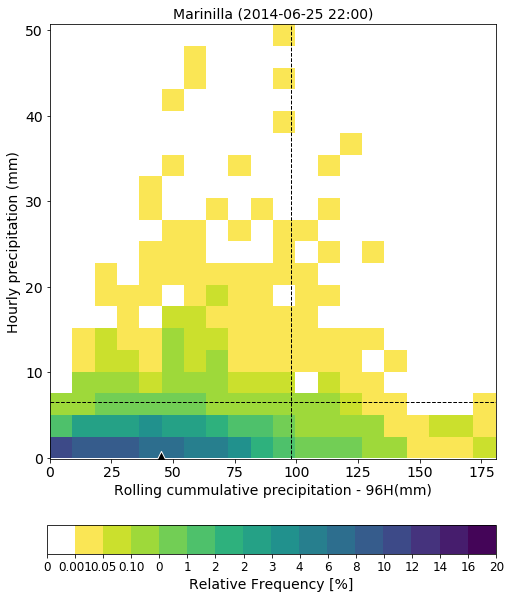

Santuario 2014-06-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.] [67.87960636]


<Figure size 432x288 with 0 Axes>

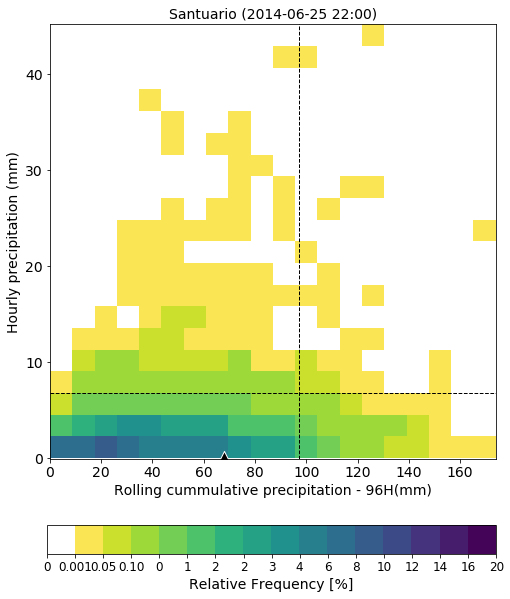

Santuario 2014-08-14
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[4.28111] [72.63475727]


<Figure size 432x288 with 0 Axes>

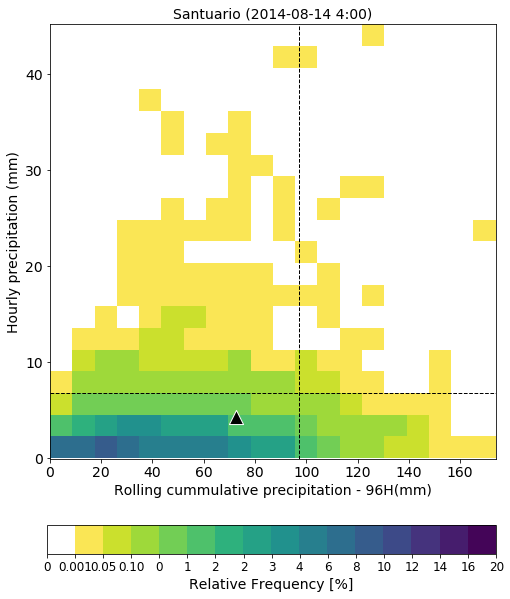

Cocorna 2015-04-03
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[3.24037] [110.22699364]


<Figure size 432x288 with 0 Axes>

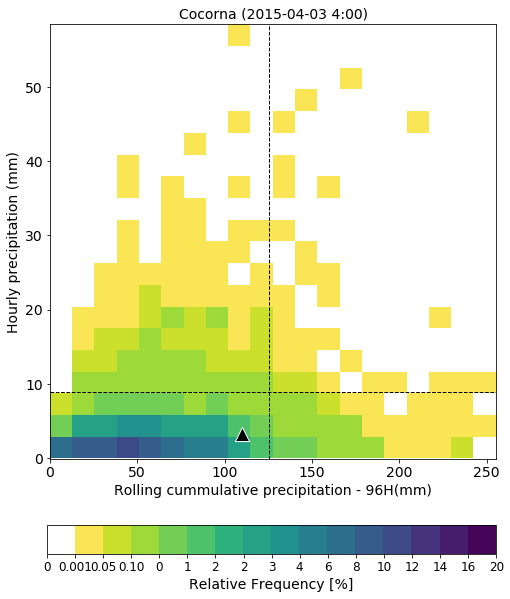

Belmira 2015-04-20
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [31.54011818]


<Figure size 432x288 with 0 Axes>

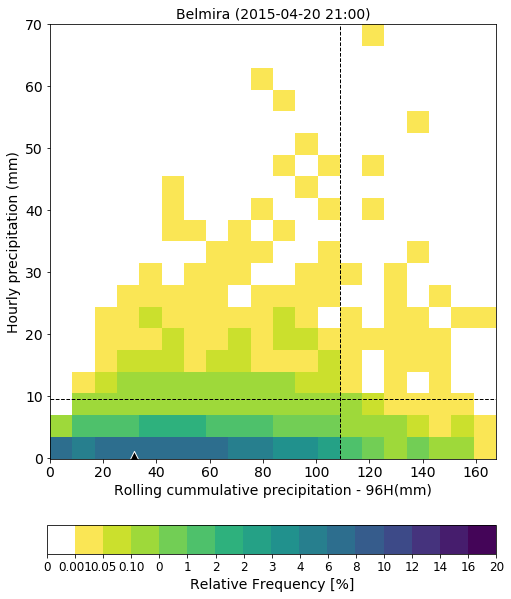

Vegachi 2015-11-12
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_42.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_42.npy
[0.] [56.60183545]


<Figure size 432x288 with 0 Axes>

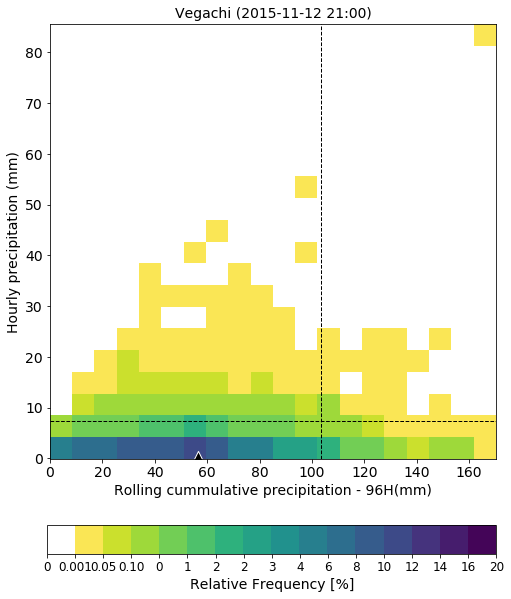

Rionegro 2016-04-28
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
Caldas 2016-05-10
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.83109] [38.78049455]


<Figure size 432x288 with 0 Axes>

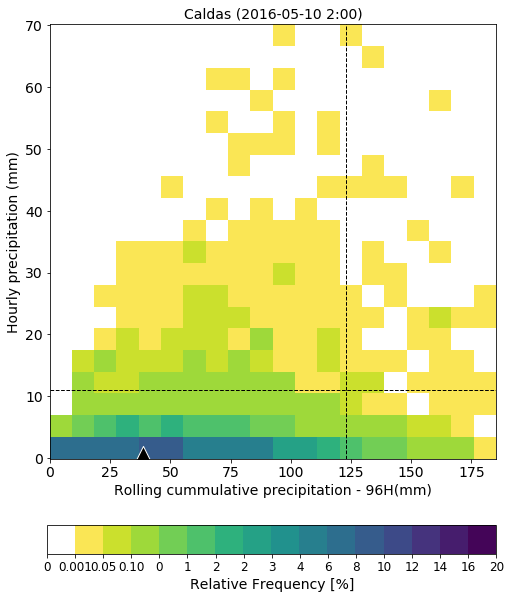

Ran Rafael 2017-06-15
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.] [84.78175818]


<Figure size 432x288 with 0 Axes>

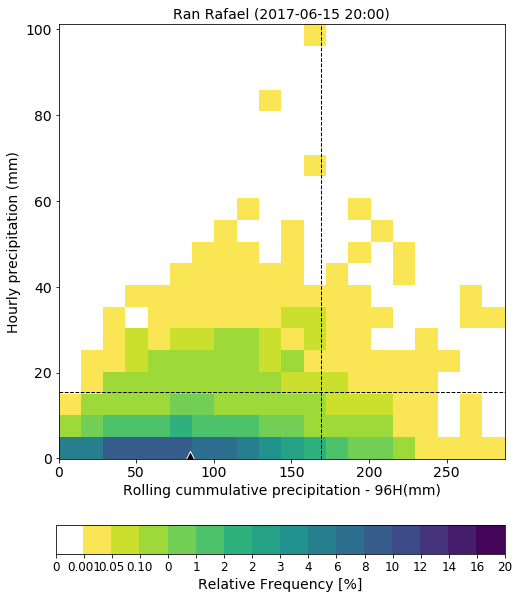

Ran Rafael 2017-09-17
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.86377273] [86.21232455]


<Figure size 432x288 with 0 Axes>

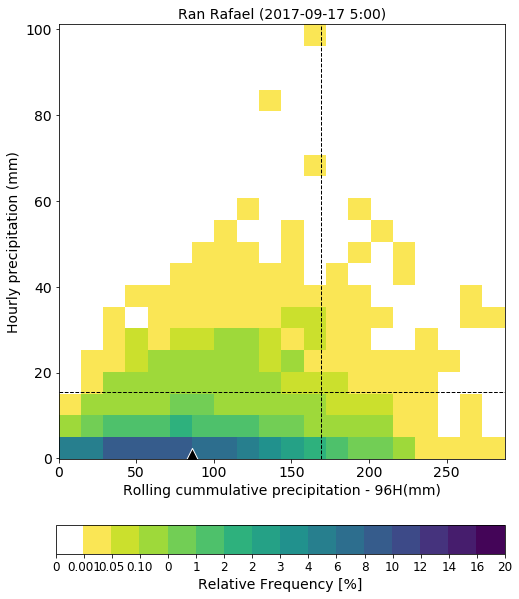

Urrao 2017-09-18
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_31.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_31.npy
[0.] [68.68176364]


<Figure size 432x288 with 0 Axes>

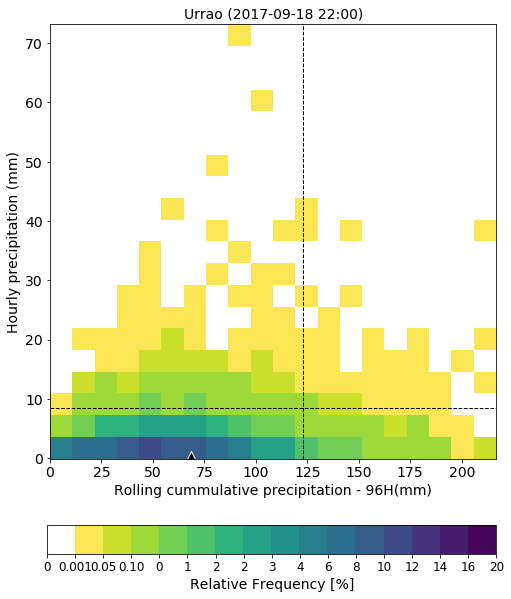

Ciudad Bolivar 2017-10-20
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy


<Figure size 432x288 with 0 Axes>

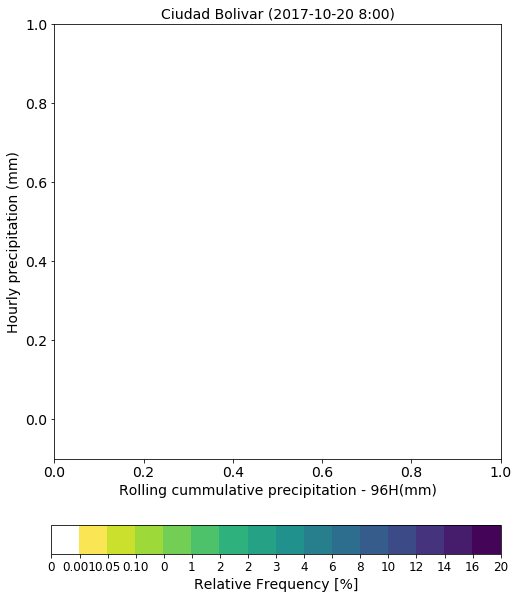

Venecia 2017-11-22
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[3.07368] [78.25246636]


<Figure size 432x288 with 0 Axes>

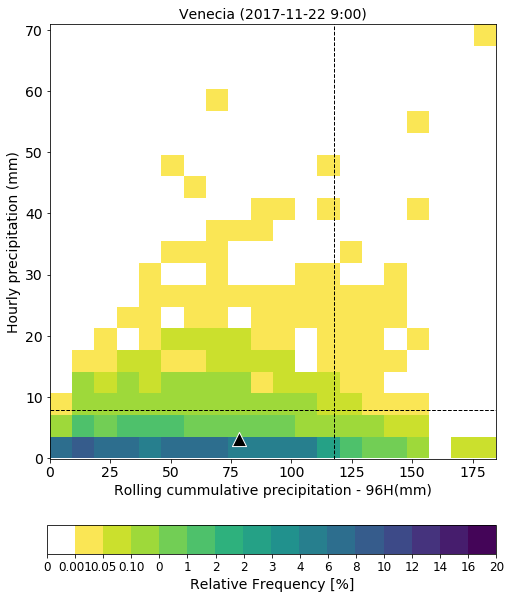

Itagui 2018-03-25
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.] [63.09134364]


<Figure size 432x288 with 0 Axes>

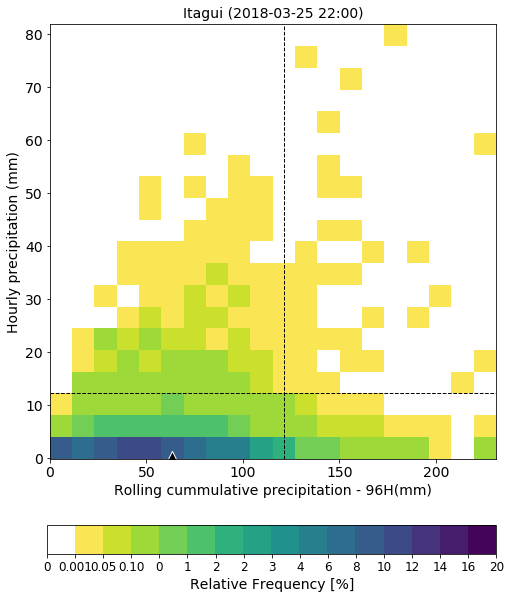

Bello 2018-03-26
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
Bello 2018-04-10
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [50.91431727]


<Figure size 432x288 with 0 Axes>

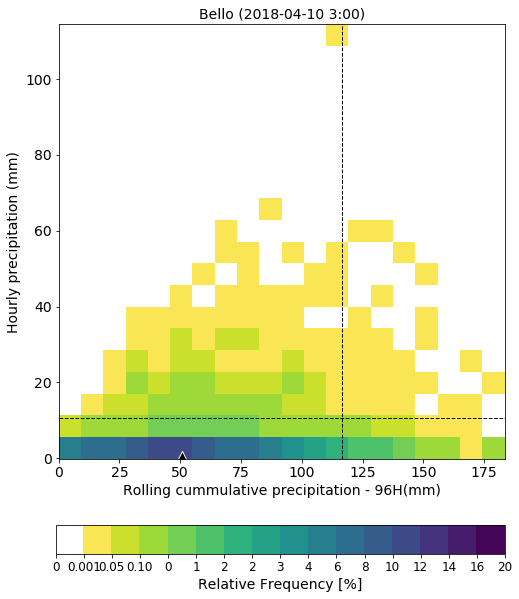

Venecia 2018-04-12
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_22.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_22.npy
[0.] [78.12160545]


<Figure size 432x288 with 0 Axes>

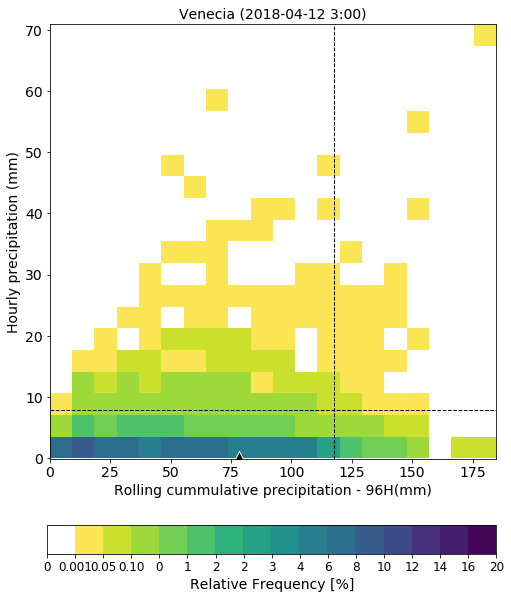

Caracoli 2018-04-26
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_34.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_34.npy
[0.] [14.74564727]


<Figure size 432x288 with 0 Axes>

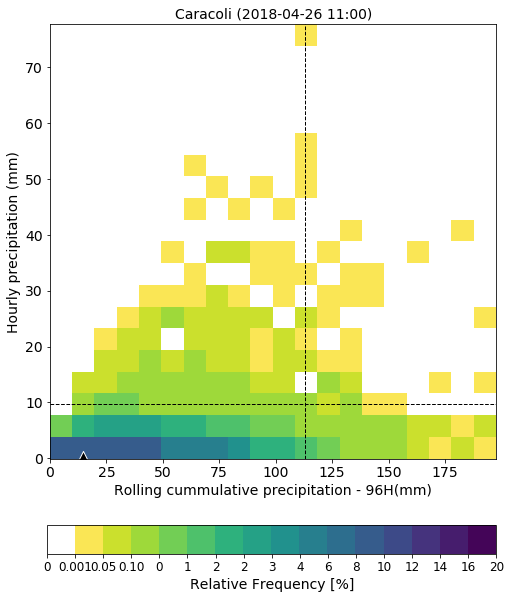

Santo Domingo 2018-04-27
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[0.] [70.78403545]


<Figure size 432x288 with 0 Axes>

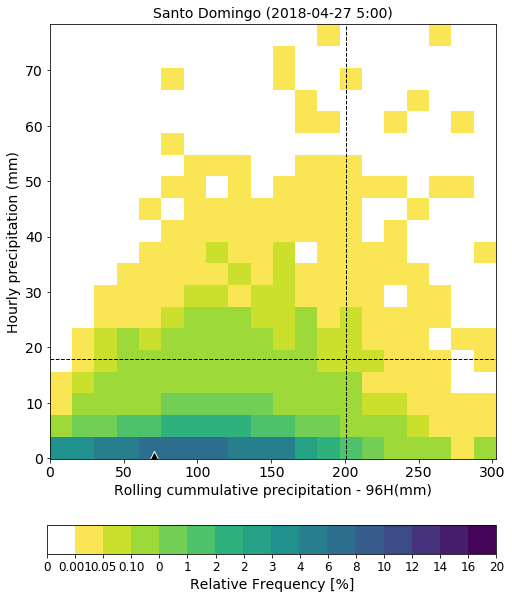

Medellin 2018-05-15
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [82.37189818]


<Figure size 432x288 with 0 Axes>

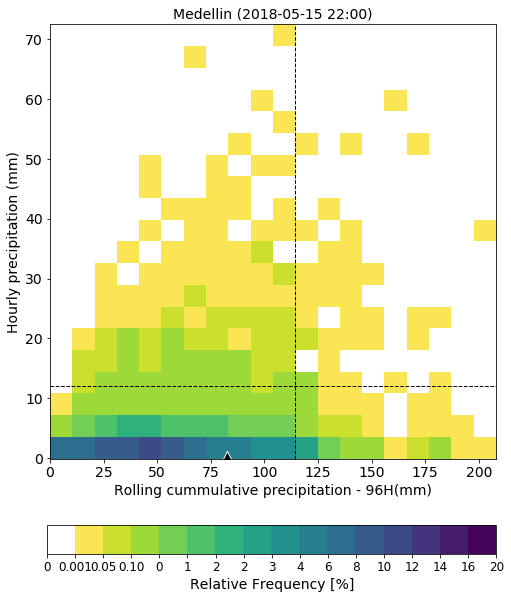

Cisneros 2018-07-21
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_33.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_33.npy
[1.68151] [61.48626455]


<Figure size 432x288 with 0 Axes>

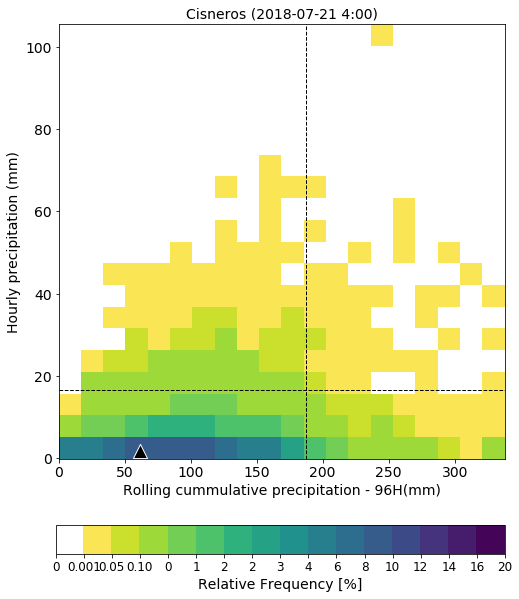

Caracoli 2018-08-05
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_34.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_34.npy
[0.] [14.02272182]


<Figure size 432x288 with 0 Axes>

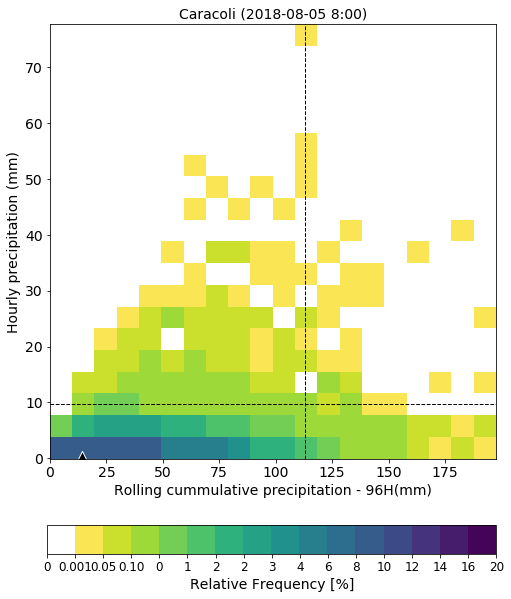

La Ceja 2018-09-14
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
Medellin 2018-09-27
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [70.44376091]


<Figure size 432x288 with 0 Axes>

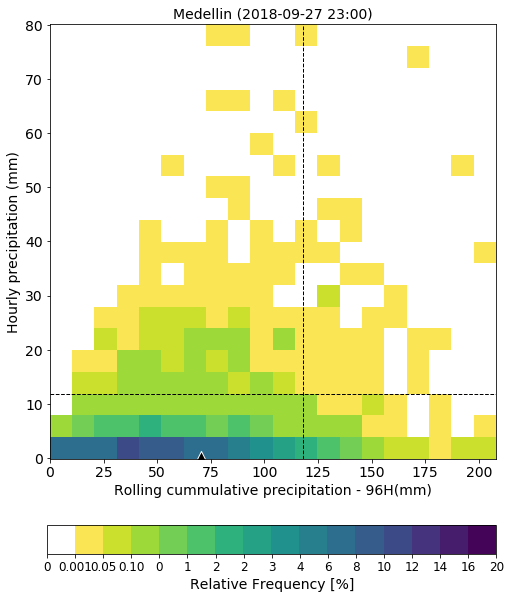

Santa Rosa de Osos 2018-10-10
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [22.96815636]


<Figure size 432x288 with 0 Axes>

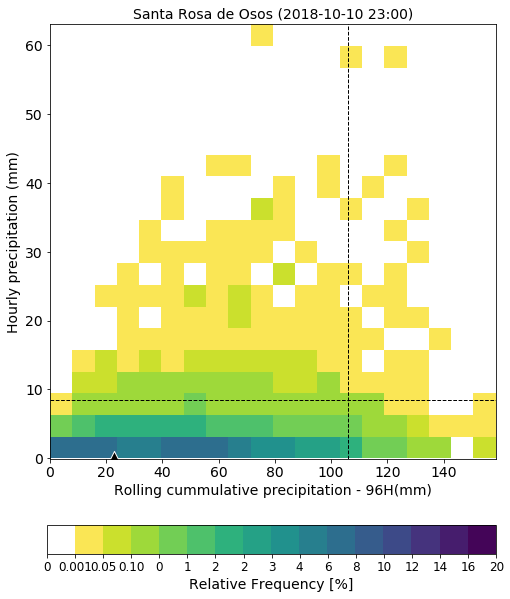

Puerto Triunfo 2018-10-24
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_24.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_24.npy
[0.64876] [45.6695]


<Figure size 432x288 with 0 Axes>

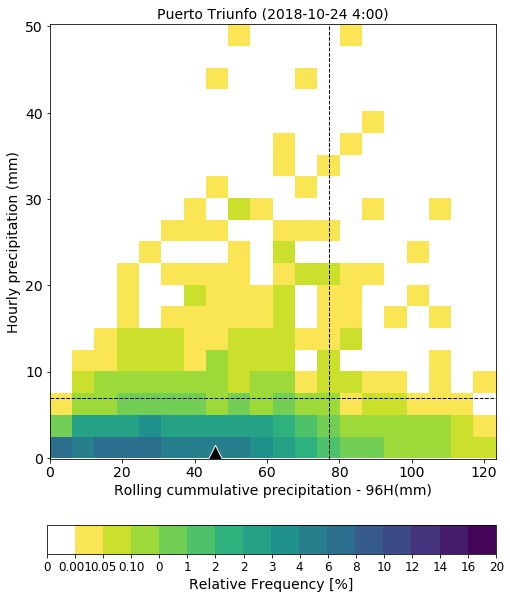

Sonson 2018-10-24
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_24.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_24.npy
[0.] [48.51468818]


<Figure size 432x288 with 0 Axes>

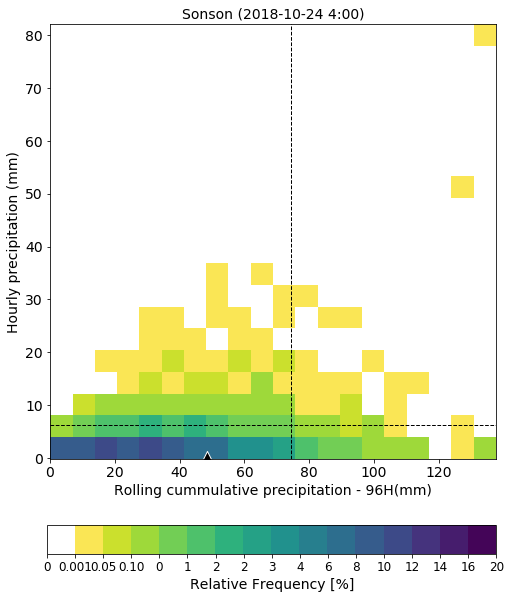

Caracoli 2018-10-29
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_34.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_34.npy
[0.] [14.74564727]


<Figure size 432x288 with 0 Axes>

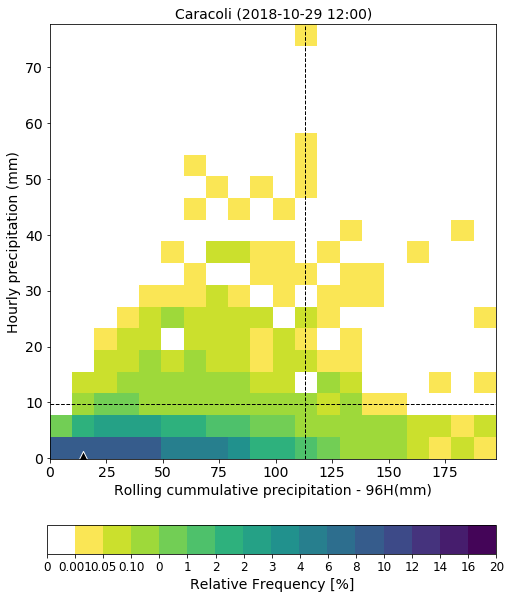

Urrao 2018-11-01
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_31.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_31.npy
[0.] [68.68176364]


<Figure size 432x288 with 0 Axes>

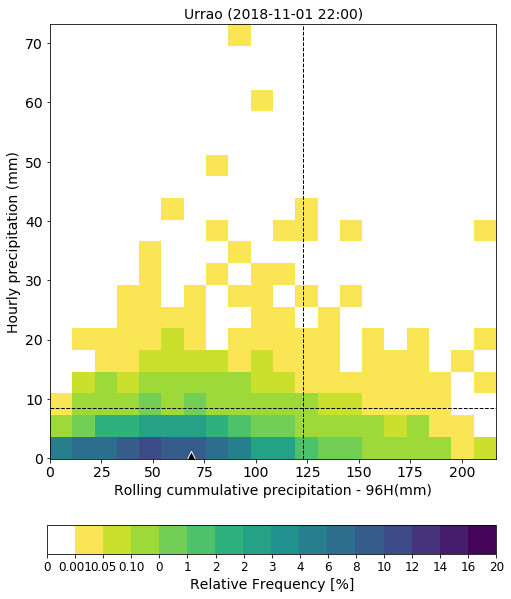

Santa Rosa de Osos 2018-11-04
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.65789] [20.47376091]


<Figure size 432x288 with 0 Axes>

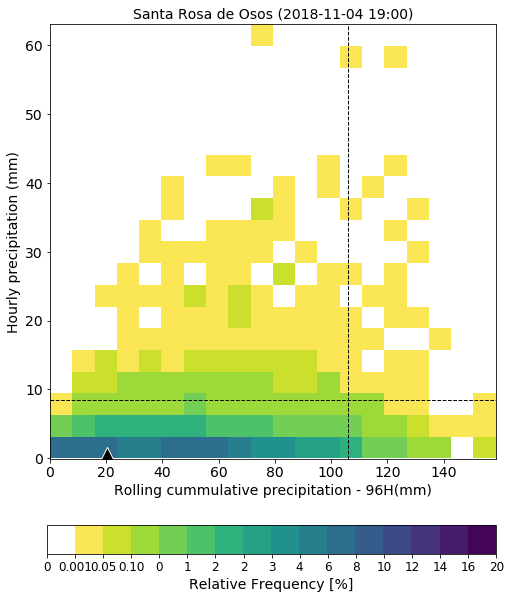

Marinilla 2018-11-06
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_23.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_23.npy
[0.] [44.93750455]


<Figure size 432x288 with 0 Axes>

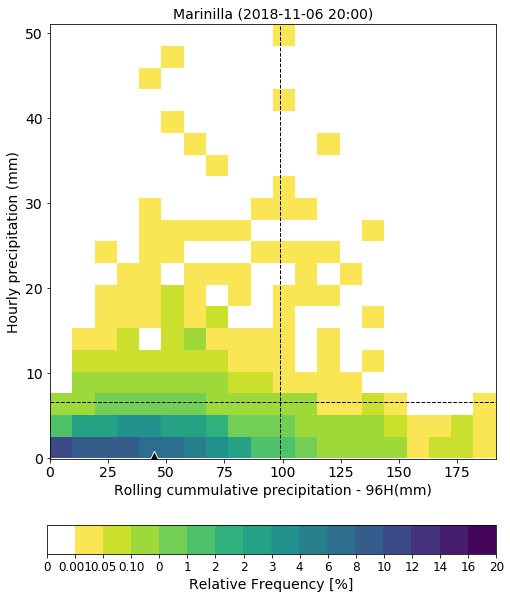

Bello 2018-11-14
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [81.31186818]


<Figure size 432x288 with 0 Axes>

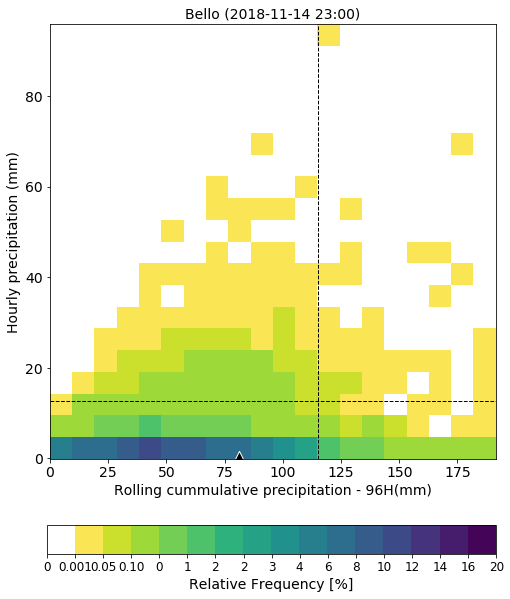

Anza 2018-11-26
/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_32.npy
/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_32.npy
[0.] [64.98714]


<Figure size 432x288 with 0 Axes>

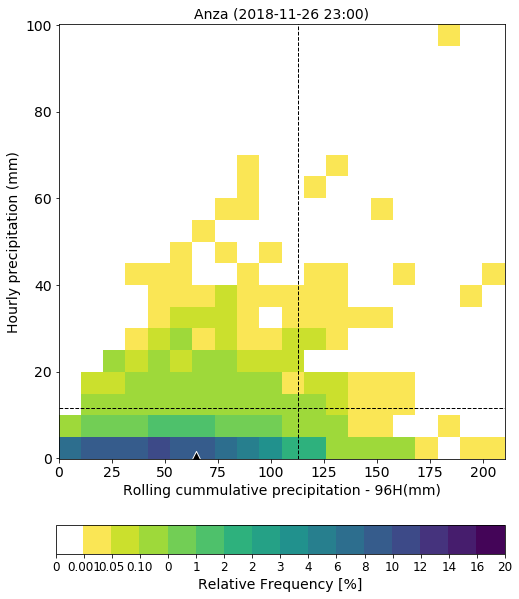

In [317]:
##

for Num in list(range(36)):

    Lat = Data[Num][3]
    Lon = Data[Num][4]

    Dia = Data[0][0]

    Punto_lat = np.where((Lats >= Lat))[0][0]
    Punto_lon = np.where((Lons >= Lon))[0][0]

    print (Data[Num][2] + ' ' + Data[Num][0])

    x = (Punto_lat//432) + 1
    y = (Punto_lon//432) + 1

    Pos_Lat = Punto_lat%432
    Pos_Lon = Punto_lon%432
    
    
    # Lectura Files

    File      = '/mnt/data/AcumuladosRadar/Horarios/AcumuladosHora_'+str(x)+str(y)+'.npy'
    X_1H = np.load(File, mmap_mode='r')
    print (File)
    
    File      = '/mnt/data/AcumuladosRadar/96Horarios/Acumulados_96_'+str(x)+str(y)+'.npy'
    X_96H = np.load(File, mmap_mode='r')
    print (File)

    
    # ---------------------------------------------------------------------------------------------------------------------

    
    Serie_96H      = np.array(X_96H[Pos_Lat-10 : Pos_Lat+10, Pos_Lon-10:Pos_Lon+10,:])
    Serie_96H_P90  = np.array([np.nanpercentile(Serie_96H[:,:,i],90) for i in list(range(Serie_96H.shape[2]))])
    DadoLluvia_96H = np.where(Serie_96H_P90 > 0)[0]
    Serie_96H_P90_DadoLluvia = Serie_96H_P90[DadoLluvia_96H]
    
    Serie_Hora      = np.array(X_1H[Pos_Lat-10 : Pos_Lat+10, Pos_Lon-10:Pos_Lon+10,:])
    Serie_Hora_P90  = np.array([np.nanpercentile(Serie_Hora[:,:,i],90) for i in list(range(Serie_Hora.shape[2]))])
    Serie_Hora_P90_DadoLluvia = Serie_Hora_P90[DadoLluvia_96H]
    
    
    Fechas = pd.date_range('2014-01-01 00:00', '2019-04-30 23:59',freq='1H')
    Fechas_DadoLluvia_96H = Fechas[96:][DadoLluvia_96H]
     
    Hora   = Serie_Hora_P90_DadoLluvia[np.isfinite(Serie_Hora_P90_DadoLluvia) & np.isfinite(Serie_96H_P90_DadoLluvia)]
    Hora96 = Serie_96H_P90_DadoLluvia[np.isfinite(Serie_Hora_P90_DadoLluvia) & np.isfinite(Serie_96H_P90_DadoLluvia)]

    SerieHora_DF = pd.DataFrame(Serie_Hora_P90_DadoLluvia, Fechas_DadoLluvia_96H)
    Serie96H_DF  = pd.DataFrame(Serie_96H_P90_DadoLluvia, Fechas_DadoLluvia_96H)
    
    Hora_dqLl   = Hora[Hora > 0]
    Hora96_dqLl = Hora96[Hora > 0]

    H, xedg, yedg = np.histogram2d(Hora96_dqLl,Hora_dqLl,bins=20)
    H = H.T
    H_PDF = H/np.sum(H)


    import matplotlib.colors as colors

    lev2 = np.array([0.,0.00001,0.0005,0.001,0.005,0.01,0.015,0.02, 0.03, 0.04,\
                    0.06, 0.08, 0.1, 0.12,\
                    0.14, 0.16,0.2])

    lev_ticks = lev2*100.

    # Este truco es para que me queden mas bonitos los ticks porque los primeros tienen muchas # cifras decimales y los ultimos
    lev_str0 = np.array(list(map(lambda x: np.str("%.3f" % x), lev_ticks[1:2])))
    lev_str1 = np.array(list(map(lambda x: np.str("%.2f" % x), lev_ticks[2:4])))
    lev_str2 = np.array(list(map(lambda x: np.str("%.f" % x), lev_ticks[4:])))
    lev_str  = np.append(['0'],lev_str0)
    lev_str  = np.append(lev_str,lev_str1)
    lev_str = np.append(lev_str, lev_str2)

    # Esta barra de colores es una viridis discreta , la cree porque no encontra una forma facil de #discretizar
    bar_colors2 = [(255,255,255),(250,230,85),(203,224,45),(158,217,58),\
                   (114,206,85),(78,193,107),(46.,177,125.),(37,161,134),\
                   (33,145,141),(39,127, 142),(45,110,142),\
                   (54,92,140), (61,74,136), (69,51,125), (70,29,109),\
                  (68,5,88)]

    color = list(map(lambda x: tuple(ti/255. for ti in x) , bar_colors2))
    my_colorbar, norm = colors.from_levels_and_colors(lev2, color)

    #H_PDF[H_PDF == 0.0] = np.nan

    label_size = 14

    plt.close()
    plt.cla()
    plt.clf()

    #fig = plt.figure()
    fig = plt.figure(figsize=[8,8])
    ax1 = fig.add_subplot(111)
    # Se hace el meshgrid con bins del hist 2d

    X, Y = np.meshgrid(xedg, yedg)
    ax1.set_xlim(0, np.max(xedg))
    ax1.set_ylim(-0.1, np.max(yedg))
    #ax1.set_xlim(0.0, 200.)
    ax1.set_xlabel('Rolling cummulative precipitation - 96H(mm)', fontsize = label_size)
    ax1.set_ylabel('Hourly precipitation (mm)', fontsize = label_size)
    ax1.tick_params(axis='x', labelsize= label_size)
    ax1.tick_params(axis='y', labelsize= label_size)
    ax1.axhline(np.nanpercentile(Hora_dqLl,95), color='k', ls='--',lw=1)
    ax1.axvline(np.nanpercentile(Hora96_dqLl,95), color='k', ls='--',lw=1)
    pc1 = ax1.pcolormesh(X, Y,H_PDF, cmap = my_colorbar, norm = norm)
    #plt.gca().set_aspect('equal',adjustable='box')

    Hour = str(int(Data[Num][1][:2]) + 2)
    if Hour == '24':
        continue
        
    try:
        Acum_Hora = SerieHora_DF[SerieHora_DF.index == Dia + ' ' + Hour + ':00'].values[0]
        Acum_96H  = Serie96H_DF[Serie96H_DF.index == Dia + ' ' + Hour + ':00'].values[0]
    
        print (Acum_Hora, Acum_96H)

        plt.scatter(Acum_96H, Acum_Hora, marker='^', s=200, color='k',edgecolor='w')
    except:
        pass
    
    
    ax1.set_title(Data[Num][2] + ' (' + Data[Num][0]+ ' '+ str(int(Data[Num][1][:2]) + 2)+':00)', \
              fontsize = label_size)



    # Aqui cuadras la barra de colores
    cbar_ax = fig.add_axes([0.12, -0.04, 0.78, 0.05])
    cbar = fig.colorbar(pc1, cax = cbar_ax, orientation = 'horizontal',\
                        ticks = lev2)
    cbar.set_label(u'Relative Frequency [%]', fontsize = label_size)
    cbar.ax.set_xticklabels(lev_str)
    cbar.ax.tick_params(labelsize=label_size-2)
    plt.savefig('00_Figures/' + Data[Num][2] + '_' + Data[Num][0] + '_2_AcumPixel.png', dpi=300, bbox_inches='tight')
    plt.show()



In [319]:
np.array([1,2,3,4]).tolist()

[1, 2, 3, 4]